
# Topic extraction with Latent Dirichlet Allocation


This is an example of applying :class:`sklearn.decomposition.LatentDirichletAllocation` on a corpus
of documents and extract additive models of the topic structure of the
corpus.  The output is a list of topics, each represented as a list of
terms (weights are not shown).


The default parameters (n_samples / n_features / n_components) should make
the example runnable in a couple of tens of seconds. You can try to
increase the dimensions of the problem, but be aware that the time
complexity is proportional to (n_samples * iterations) in LDA.

* http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/
* https://stackoverflow.com/questions/20349958/understanding-lda-implementation-using-gensim




In [3]:
# Exemplo 1 (scikit-learn lda)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pickle

n_features = 10
n_topics = 2
n_top_words = 20

# Print the n_top_words in order
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Training dataset
data_samples = ["I like to eat broccoli and bananas.",
                "I ate a banana and spinach smoothie for breakfast.",
                "Chinchillas and kittens are cute.",
                "My sister adopted a kitten yesterday.",
                "Look at this cute hamster munching on a piece of broccoli."
               ]
# extract fetures and vectorize dataset
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

#save features
dic = tf_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

# train LDA
p1 = lda.fit(tf)

# Save all data necessary for later prediction
# model = (dic,lda.components_,lda.exp_dirichlet_component_,lda.doc_topic_prior_)

print_top_words(lda, dic, n_top_words)

Topic #0: cute adopted broccoli munching look piece smoothie sister kittens like
Topic #1: like broccoli adopted munching piece kittens sister look smoothie cute
()


In [25]:
# Exemplo 2 (scikit-learn lda)

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


# Print the n_top_words in order
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]


# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data_samples)
print()

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
Extracting tf features for LDA...

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...

Topics in LDA model:
Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7: car year jus

## Utilizando ldamodel/gensim em um exemplo pequeno para entender o contexto


Suponha que temos as seguintes sentenças: 

    I like to eat broccoli and bananas.
    I ate a banana and spinach smoothie for breakfast.
    Chinchillas and kittens are cute.
    My sister adopted a kitten yesterday.
    Look at this cute hamster munching on a piece of broccoli.

Após passar elas por um pré-processamento no PreText2, teremos:

    eat broccoli banana | 
    at banana spinach smoothi breakfast | 
    chinchilla kitten cute |
    sister adopt kitten yesterdai | 
    cute hamster munch piec broccoli |
    
Desta forma, podemos rodar o LDA para descobrir a relação de 2 tópicos, um relacionado a alimentos e outro a animais fofos.

In [ ]:
# Tentativa mais próxima do satisfatório (Com um exemplo pequeno para entender o contexto)

import numpy
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

QGS1 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/text-example_Maid/1.txt', 'r')
QGS2 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/text-example_Maid/2.txt', 'r')
QGS3 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/text-example_Maid/3.txt', 'r')
QGS4 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/text-example_Maid/4.txt', 'r')
QGS5 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/text-example_Maid/5.txt', 'r')


# Criando variáveis com o conteudo dos arquivos
textQGS1 = QGS1.read()
textQGS2 = QGS2.read()
textQGS3 = QGS3.read()
textQGS4 = QGS4.read()
textQGS5 = QGS5.read()


# Juntando as variáveis em uma lista, onde cada componente é um documento
docSet = [textQGS1, textQGS2, textQGS3, textQGS4, textQGS5]

texts = []

# Loop na lista de documentos
for i in docSet:
    
    # Removendo as barras | do arquivo e separando por tokens
    tokens = tokenizer.tokenize(i)    
    
    # Adiciona os tokens criados em uma lista
    texts.append(tokens)

# Transforma os documentos tokenizados em um id <-> termo do dicionário
dictionary = corpora.Dictionary(texts)
    
# Converte os documentos tokenizados em uma matriz documento/termo
corpus = [dictionary.doc2bow(text) for text in texts]

# Gerar o LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=200)

# Imprimir os tópicos em destaque
print(ldamodel.print_topics(num_topics=2, num_words=3))

# Fechando os arquivos
QGS1.close()
QGS2.close()
QGS3.close()
QGS4.close()
QGS5.close()


## Utilizando ldamodel/gensim no problema real (Com o QGS pré-processado)


Agora iremos generalizar o problema acima para o QGS da Revisão do Francisco.

É notório dizer que a string de busca utilizada por ele foi:

    (("software process improvement") AND 
     ("business  goal" OR "strategic" OR "goal oriented" OR "business oriented" OR "business strategy")  AND
     ("alignment" OR "in line with" OR "geared to" OR "aligned with" OR "linking")  AND
     ("method" OR "approach" OR "framework" OR "methodology"))
 

In [69]:
# Tentativa mais próxima do satisfatório (Com o GQS pré-processado)

import numpy
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# Abrindo os arquivos de texto (texts_Maids = Metadados e text_Maid = Texto Completo)
QGS1 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS I.txt', 'r')
QGS2 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS II.txt', 'r')
QGS3 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS III.txt', 'r')
QGS4 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS IV.txt', 'r')
QGS5 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS V.txt', 'r')
QGS6 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS VI.txt', 'r')
QGS7 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS VII.txt', 'r')
QGS8 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS VIII.txt', 'r')
QGS9 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS IX.txt', 'r')
QGS10 = open('/home/fuchs/Documentos/MESTRADO/Masters/Pre-Processing/Files/texts_Maid/QGS X.txt', 'r')


# Criando variáveis com o conteudo dos arquivos
textQGS1 = QGS1.read()
textQGS2 = QGS2.read()
textQGS3 = QGS3.read()
textQGS4 = QGS4.read()
textQGS5 = QGS5.read()
textQGS6 = QGS6.read()
textQGS7 = QGS7.read()
textQGS8 = QGS8.read()
textQGS9 = QGS9.read()
textQGS10 = QGS10.read()

# Juntando as variáveis em uma lista, onde cada componente é um documento
docSet = [textQGS1, textQGS2, textQGS3, textQGS4, textQGS5, textQGS6, textQGS7, textQGS8, textQGS9, textQGS10]

texts = []

# Loop na lista de documentos
for i in docSet:
    
    # Removendo as barras | do arquivo e separando por tokens
    tokens = tokenizer.tokenize(i)    
    
    # Adiciona os tokens criados em uma lista
    texts.append(tokens)

# Transforma os documentos tokenizados em um id <-> termo do dicionário
dictionary = corpora.Dictionary(texts)
    
# Converte os documentos tokenizados em uma matriz documento/termo
# A função doc2bow () simplesmente conta o número de ocorrências de cada palavra distinta, 
# converte a palavra em um id da palavra inteiro e retorna o resultado como um vetor esparso
corpus = [dictionary.doc2bow(text) for text in texts]

# Gerar o LDA model (https://radimrehurek.com/gensim/models/ldamodel.html)

# gensim.models.ldamodel.LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, 
#                                              update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, 
#                                              eval_every=10, iterations=50, gamma_threshold=0.001, 
#                                              minimum_probability=0.01, random_state=None, ns_conf=None, 
#                                              minimum_phi_value=0.01, per_word_topics=False, callbacks=None, 
#                                              dtype=<type 'numpy.float32'>)

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word = dictionary, passes=50)

# Imprimir os tópicos em destaque
print("Imprimindo resultados: ['Porcentagem*'Termo']")
print(ldamodel.print_topics(num_topics=1, num_words=10))
print("\n")
print("Imprimindo resultados: ['Termo', Porcentagem]")
print(ldamodel.show_topics(num_topics=1, num_words=10, log=False, formatted=False))

# Fechando os arquivos
QGS1.close()
QGS2.close()
QGS3.close()
QGS4.close()
QGS5.close()
QGS6.close()
QGS7.close()
QGS8.close()
QGS9.close()
QGS10.close()

Imprimindo resultados: ['Porcentagem*'Termo']
[(0, u'0.028*"goal" + 0.027*"process" + 0.022*"improv" + 0.017*"softwar" + 0.013*"measur" + 0.013*"level" + 0.013*"busi" + 0.010*"organ" + 0.009*"defin" + 0.009*"requir"')]


Imprimindo resultados: ['Termo', Porcentagem]
[(0, [(u'goal', 0.02824025), (u'process', 0.027116263), (u'improv', 0.022233931), (u'softwar', 0.01714085), (u'measur', 0.013382509), (u'level', 0.013101509), (u'busi', 0.013066383), (u'organ', 0.010326659), (u'defin', 0.009272919), (u'requir', 0.009272919)])]


## Utilizando sklearn/LatentDirichletAllocation no problema real (Sem o QGS pré-processado)


Agora iremos utilizar uma outra biblioteca para sanar o mesmo problema, porém sem utilizar os arquivos do QGS pré-processados.

É notório dizer que a string de busca utilizada por ele foi:

    (("software process improvement") AND 
     ("business  goal" OR "strategic" OR "goal oriented" OR "business oriented" OR "business strategy")  AND
     ("alignment" OR "in line with" OR "geared to" OR "aligned with" OR "linking")  AND
     ("method" OR "approach" OR "framework" OR "methodology"))

Funções utilizadas:

**CountVectorizer** (input = ’content’, encoding = ’utf-8’, decode_error = ’strict’, strip_accents = None, lowercase = True, preprocessor = None, tokenizer = None, stop_words = None, token_pattern = ’(?u)\b\w\w+\b’, ngram_range = (1, 1), analyzer = ’word’, max_df = 1.0, min_df = 1, max_features = None, vocabulary = None, binary = False, dtype = <class ‘numpy.int64’>)

Convert a collection of text documents to a matrix of token counts.

*input : string {‘filename’, ‘file’, ‘content’}*

If ‘filename’, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze. If ‘file’, the sequence items must have a ‘read’ method (file-like object) that is called to fetch the bytes in memory. Otherwise the input is expected to be the sequence strings or bytes items are expected to be analyzed directly.

*encoding : string, ‘utf-8’ by default.*

If bytes or files are given to analyze, this encoding is used to decode.

*decode_error : {‘strict’, ‘ignore’, ‘replace’}*

Instruction on what to do if a byte sequence is given to analyze that contains characters not of the given encoding. By default, it is ‘strict’, meaning that a UnicodeDecodeError will be raised. Other values are ‘ignore’ and ‘replace’.

*strip_accents : {‘ascii’, ‘unicode’, None}*

Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing. Both ‘ascii’ and ‘unicode’ use NFKD normalization from unicodedata.normalize.

*lowercase : boolean, True by default*

Convert all characters to lowercase before tokenizing.

*preprocessor : callable or None (default)*

Override the preprocessing (string transformation) stage while preserving the tokenizing and n-grams generation steps.

*tokenizer : callable or None (default)*

Override the string tokenization step while preserving the preprocessing and n-grams generation steps. Only applies if analyzer == 'word'.

*stop_words : string {‘english’}, list, or None (default)*

If ‘english’, a built-in stop word list for English is used. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words). If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'. If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

*token_pattern : string*

Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'. The default regexp select tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).

*ngram_range : tuple (min_n, max_n)*

The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

*analyzer : string, {‘word’, ‘char’, ‘char_wb’} or callable* 

Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space. If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.

*max_df : float in range [0.0, 1.0] or int, default=1.0*

When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

*min_df : float in range [0.0, 1.0] or int, default=1*

When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

*max_features : int or None, default=None* 

If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. This parameter is ignored if vocabulary is not None.

*vocabulary : Mapping or iterable, optional*

Either a Mapping (e.g., a dict) where keys are terms and values are indices in the feature matrix, or an iterable over terms. If not given, a vocabulary is determined from the input documents. Indices in the mapping should not be repeated and should not have any gap between 0 and the largest index.

*binary : boolean, default=False*

If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

*dtype : type, optional*

Type of the matrix returned by fit_transform() or transform().

<br>

**.fit_transform(raw_documents, y=None)**

Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by transform, but more efficiently implemented.

Parameters:	
*raw_documents : iterable*

An iterable which yields either str, unicode or file objects.

Returns:	
*X : array, [n_samples, n_features]*

Document-term matrix.

<br>

**.get_feature_names()**

Array mapping from feature integer indices to feature name

<br>

**LatentDirichletAllocation** (n_components = 10, doc_topic_prior = None, topic_word_prior = None, learning_method = ’batch’, learning_decay = 0.7, learning_offset = 10.0, max_iter = 10, batch_size = 128, evaluate_every = -1, total_samples = 1000000.0, perp_tol = 0.1, mean_change_tol = 0.001, max_doc_update_iter = 100, n_jobs = None, verbose = 0, random_state = None, n_topics = None)

*n_components : int, optional (default = 10)*

Number of topics.

*doc_topic_prior : float, optional (default=None)*

Prior of document topic distribution theta. If the value is None, defaults to 1 / n_components. In the literature, this is called alpha.

*topic_word_prior : float, optional (default=None)*

Prior of topic word distribution beta. If the value is None, defaults to 1 / n_components. In the literature, this is called beta.

*learning_method : ‘batch’ | ‘online’, default=’batch’*

Method used to update _component. Only used in fit method. In general, if the data size is large, the online update will be much faster than the batch update.

Valid options:

'batch': Batch variational Bayes method. Use all training data in each EM update. Old components_ will be overwritten in each iteration.
'online': Online variational Bayes method. In each EM update, use mini-batch of training data to update the components_ variable incrementally. The learning rate is controlled by the learning_decay and the learning_offset parameters.

*learning_decay : float, optional (default=0.7)*

It is a parameter that control learning rate in the online learning method. The value should be set between (0.5, 1.0] to guarantee asymptotic convergence. When the value is 0.0 and batch_size is n_samples, the update method is same as batch learning. In the literature, this is called kappa.

*learning_offset : float, optional (default=10.)*

A (positive) parameter that downweights early iterations in online learning. It should be greater than 1.0. In the literature, this is called tau_0.

*max_iter : integer, optional (default=10)*

The maximum number of iterations.

*batch_size : int, optional (default=128)*

Number of documents to use in each EM iteration. Only used in online learning.

*evaluate_every : int, optional (default=0)*

How often to evaluate perplexity. Only used in fit method. set it to 0 or negative number to not evalute perplexity in training at all. Evaluating perplexity can help you check convergence in training process, but it will also increase total training time. Evaluating perplexity in every iteration might increase training time up to two-fold.

*total_samples : int, optional (default=1e6)*

Total number of documents. Only used in the partial_fit method.

*perp_tol : float, optional (default=1e-1)*

Perplexity tolerance in batch learning. Only used when evaluate_every is greater than 0.

*mean_change_tol : float, optional (default=1e-3)*

Stopping tolerance for updating document topic distribution in E-step.

*max_doc_update_iter : int (default=100)*

Max number of iterations for updating document topic distribution in the E-step.

*n_jobs : int or None, optional (default=None)*

The number of jobs to use in the E-step. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

*verbose : int, optional (default=0)*

Verbosity level.

*random_state : int, RandomState instance or None, optional (default=None)*

If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

*n_topics : int, optional (default=None)*

This parameter has been renamed to n_components and will be removed in version 0.21. .. deprecated:: 0.19


**.fit(X, y = None)**

Learn model for the data X with variational Bayes method. When learning_method is ‘online’, use mini-batch update. Otherwise, use batch update.
Parameters:	

*X : array-like or sparse matrix, shape=(n_samples, n_features)*

Document word matrix.

*y : Ignored*

Returns: None
 

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import load_files

number_topics = 2
number_words = 10
max_document_frequency = 1.0
min_document_frequency = 0.4
ngram = (1,3)
max_features = None

alpha = None
beta = None
learning = 'batch' # Bacth or Online
iterations = 500

# Print the topics with the words in order
def print_top_words(model, feature_names, number_words):
    for topic_index, topic in enumerate(model.components_):
        message = "Topic %d: " % (topic_index + 1)
        message += "{"
        message += " - ".join([feature_names[i]
                             for i in topic.argsort()[:-number_words - 1:-1]])
        message += "}\n"
        print(message)

# Load training dataset
files = load_files(container_path = '/home/fuchs/Documentos/MESTRADO/Masters/Files-QGS/QGS-txt', encoding = "iso-8859-1")


# Extract words and vectorize dataset
tf_vectorizer = CountVectorizer(max_df = max_document_frequency,
                                min_df = min_document_frequency,
                                ngram_range = ngram,
                                max_features = max_features,
                                stop_words = 'english')

tf = tf_vectorizer.fit_transform(files.data)

# Save word names in a dicionary
dic = tf_vectorizer.get_feature_names()

# Execute lda and training
lda = LatentDirichletAllocation(n_components = number_topics,
                                doc_topic_prior = alpha,
                                topic_word_prior = beta,
                                learning_method = learning, 
                                learning_decay = 0.7,
                                learning_offset = 10.0,
                                max_iter = iterations,
                                batch_size = 128,
                                evaluate_every = -1,
                                total_samples = 1000000.0,
                                perp_tol = 0.1,
                                mean_change_tol = 0.001,
                                max_doc_update_iter = 100,
                                random_state = None)
lda.fit(tf)

print(lda.components_)
# Print the topics (number_topics) with the words (number_words)

print_top_words(lda, dic, number_words)

[[ 0.51998236  0.51659844  0.51756236  0.51722316  0.51940122  0.51637261
   0.51724284  0.52097552  0.51846673  0.51766711  0.51998236  0.51621688
   0.51465192  0.52076596  0.52276839  0.52276839  0.52105388  0.52037802
   0.51702257  0.51624633  0.51615773  0.51653754  0.51676433  0.51571712
   0.52007954  0.51691658  0.51504855  0.51683174  0.51653211  0.52356185
   0.51940413  0.52215982]
 [10.48001764  4.48340156 15.48243764 11.48277684 23.48059878  5.48362739
  11.48275716 10.47902448 17.48153327 35.48233289 10.48001764  5.48378312
   8.48534808  4.47923404  5.47723161  5.47723161 21.47894612 12.47962198
  10.48297743  9.48375367  5.48384227 37.48346246 22.48323567  7.48428288
   8.47992046 58.48308342 10.48495145 17.48316826 15.48346789  9.47643815
  10.48059587  6.47784018]]
Topic 1: {strategies - linking software - linking - success - measurement - goal - levels - organization - results - keywords}

Topic 2: {software - process - improvement - business - process improvement -

## Incrementando a solução utilizando WordCloud (Sem o QGS pré-processado)

Tentando criar um wordcloud para os tópicos apresentados, baseando-se no link: https://github.com/meghendra/msr-lda-wordclouds/blob/master/LDAonMunichSecurityReport2017.ipynb

Tutorial WordCloud: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

The topics in a text: 

Topic 1: {software - measurement - goals - organization - strategy - strategies - approach - business - goal - level}

Topic 2: {process - improvement - software - process improvement - software process - business - software process improvement - based - software development - development}

The topics in a image: 



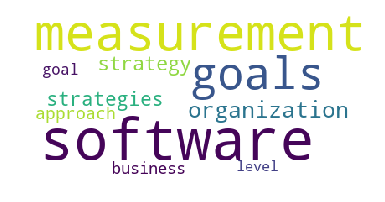

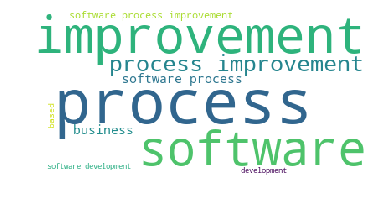

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
import math
import wordcloud

number_topics = 2
number_words = 10
max_document_frequency = 1.0
min_document_frequency = 0.4
ngram = (1, 3)
max_features = None

alpha = None
beta = None
learning = 'batch'  # Bacth or Online
iterations = 500


# Print the topics with the words in order
def print_top_words(model, feature_names, number_words):
    for topic_index, topic in enumerate(model.components_):
        message = "Topic %d: " % (topic_index + 1)
        message += "{"
        message += " - ".join([feature_names[i]
                               for i in topic.argsort()[:-number_words - 1:-1]])
        message += "}\n"
        print(message)


# Load training dataset
files = load_files(container_path='/home/fuchs/Documentos/MESTRADO/Masters/Files-QGS/QGS-txt', encoding="iso-8859-1")

# Extract words and vectorize dataset
tf_vectorizer = CountVectorizer(max_df=max_document_frequency,
                                min_df=min_document_frequency,
                                ngram_range=ngram,
                                max_features=max_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(files.data)

# Save word names in a dicionary
dic = tf_vectorizer.get_feature_names()

# Execute lda and training
lda = LatentDirichletAllocation(n_components=number_topics,
                                doc_topic_prior=alpha,
                                topic_word_prior=beta,
                                learning_method=learning,
                                learning_decay=0.7,
                                learning_offset=10.0,
                                max_iter=iterations,
                                batch_size=128,
                                evaluate_every=-1,
                                total_samples=1000000.0,
                                perp_tol=0.1,
                                mean_change_tol=0.001,
                                max_doc_update_iter=100,
                                random_state=None)
lda.fit(tf)

# Print the topics (number_topics) with the words (number_words)
print("The topics in a text: \n")

print_top_words(lda, dic, number_words)

# Print the wordcloud
print("The topics in a image: \n")

for i in range(0, number_topics):
    termsInTopic = lda.components_[i].argsort()[:-number_words - 1:-1]
    termsAndCounts = []
    for term in termsInTopic:
        termsAndCounts.append((str(dic[term].encode('utf-8').strip()), math.ceil(lda.components_[i][term] * 1000)))
    cloud = wordcloud.WordCloud(background_color="white")
    cloud.generate_from_frequencies(dict(termsAndCounts))
    plt.imshow(cloud)
    plt.axis("off")
    plt.savefig(str(i))
    plt.show()

